# Logistic Regression

## Importing the libraries

In [1]:
# analysis
import numpy as np
import pandas as pd
import json

# other
import warnings
import os
import requests

# visualisation libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# Notebook styling
%matplotlib inline
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
warnings.filterwarnings("ignore")

# model evaluation
from sklearn import metrics

In [2]:
def mode_from_modeslist(string):
    
    # remove the squre brackets
    string = string.replace("['", '')
    string = string.replace("']", '')
    
    # split the string
    return string.split("', '")[0].lower()

## Importing the dataset

In [3]:
# import predicted data
csv_path = os.path.join('..','..', '..', '..', 'resources', 'data', 'processed', 'modedetection_train_20210513_v003.csv')
df_train = pd.read_csv(csv_path)

# set leg id as index
df_train.set_index('leg_id', inplace=True)
# df_train.dropna(inplace=True)

print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 16a4e855-e304-4ccb-8e76-fe4ef2216923 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   leg_accel_25        209 non-null    float64
 1   leg_accel_50        209 non-null    float64
 2   leg_accel_75        209 non-null    float64
 3   leg_accel_90        209 non-null    float64
 4   leg_accel_ave       209 non-null    float64
 5   leg_accel_init50m   209 non-null    float64
 6   leg_accel_max       209 non-null    float64
 7   leg_accel_min       209 non-null    float64
 8   leg_accel_std       209 non-null    float64
 9   leg_duration        209 non-null    float64
 10  leg_length          209 non-null    float64
 11  leg_speed_25        209 non-null    float64
 12  leg_speed_50        209 non-null    float64
 13  leg_speed_75        209 non-null    float64
 14  leg_speed_90        209 non-null    float64

leg_accel_25  leg_accel_50  \
leg_id                                                             
16a4e855-e304-4ccb-8e76-fe4ef2216923     -1.315303           0.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e     -1.221589           0.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2     -0.323230           0.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510     -0.460111           0.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f     -0.323702           0.0   

                                      leg_accel_75  leg_accel_90  \
leg_id                                                             
16a4e855-e304-4ccb-8e76-fe4ef2216923      1.152072      6.870927   
2a46c150-ff81-4eb2-8263-dbf574928e4e      1.171396      8.474518   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      0.263662      1.653019   
51f45eeb-4dd6-4c3b-9051-b53c60622510      0.448630      2.717465   
7d527d7b-5edc-4b0e-8e64-be45825c785f      0.341619      1.457552   

                                      leg_accel_ave  leg_accel_init50m  \
leg_id                                                                   
16a4e855-e304-4ccb-8e76-fe4ef2216923      -0.028528           0.619748   
2a46c150-ff81-4eb2-8263-dbf574928e4e       0.134614           0.914531   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      -0.064622           0.127058   
51f45eeb-4dd6-4c3b-9051-b53c60622510       0.016571           0.537427   
7d527d7b-5edc-4b0e-8e64-be45825c785f      -0.077108           0.079883   

                                      leg_accel_max  leg_accel_min  \
leg_id                                                               
16a4e855-e304-4ccb-8e76-fe4ef2216923      17.533287     -20.737753   
2a46c150-ff81-4eb2-8263-dbf574928e4e      34.993622     -31.068148   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       9.872660      -6.084909   
51f45eeb-4dd6-4c3b-9051-b53c60622510      17.038904     -17.018185   
7d527d7b-5edc-4b0e-8e64-be45825c785f       5.203169     -10.204997   

                                      leg_accel_std  leg_duration  ...  \
leg_id                                                             ...   
16a4e855-e304-4ccb-8e76-fe4ef2216923       5.733544         958.0  ...   
2a46c150-ff81-4eb2-8263-dbf574928e4e       8.663125        1195.0  ...   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       1.648715        2280.0  ...   
51f45eeb-4dd6-4c3b-9051-b53c60622510       3.943009        1064.0  ...   
7d527d7b-5edc-4b0e-8e64-be45825c785f       1.589380        3922.0  ...   

                                      leg_speed_max  leg_speed_min  \
leg_id                                                               
16a4e855-e304-4ccb-8e76-fe4ef2216923      21.475367            0.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e      35.417755            0.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       9.872660            0.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510      17.970194            0.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f      10.366767            0.0   

                                      leg_speed_std  trip_duration  \
leg_id                                                               
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.230792           1025   
2a46c150-ff81-4eb2-8263-dbf574928e4e      11.442848           1300   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       2.205666           2460   
51f45eeb-4dd6-4c3b-9051-b53c60622510       5.955676           1100   
7d527d7b-5edc-4b0e-8e64-be45825c785f       2.012237           4225   

                                      trip_length  modescore_walk  \
leg_id                                                              
16a4e855-e304-4ccb-8e76-fe4ef2216923     19912.09            75.0   
2a46c150-ff81-4eb2-8263-dbf574928e4e     58643.01            75.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2    193496.83            75.0   
51f45eeb-4dd6-4c3b-9051-b53c60622510     34050.32            75.0   
7d527d7b-5edc-4b0e-8e64-be45825c785f    245053.04            75.0   

                                      modescore_car  modescore_bicycle  \
leg_id         

## Sub-dividing Training Features

- A0 - All Features 
- B0 - Speed
- B1 - Speed + Acceleration
- B2 - Speed + Modality Score
- B3 - Speed + GTFS
- B4 - Speed + Acceleration + Modality Score
- C0 - Acceleration
- C1 - Acceleration + Modality Score
- C2 - Acceleration + GTFS
- C3 - Acceleration + Modality Score + GTFS
- D0 - Modality Score
- D1 - Modality Score + GTFS
- E0 - GTFS





In [4]:
# define features sets
dict_features = {"a0": [feat for feat in df_train.columns],
                 "b0": [feat for feat in df_train.columns
                        if 'speed_' in feat],
                 "b1": [feat for feat in df_train.columns
                        if 'speed_' in feat
                        or 'accel_' in feat],
                "b2": [feat for feat in df_train.columns
                       if 'speed_' in feat
                       or 'modescore_' in feat],
                 "b4": [feat for feat in df_train.columns
                        if 'speed_' in feat
                        or 'accel_' in feat
                        or 'modescore_' in feat],
                 "c0": [feat for feat in df_train.columns
                        if 'accel_' in feat],
                 "d0": [feat for feat in df_train.columns
                        if 'modescore_' in feat]}

for feature_set in dict_features.keys():
    
    print(f"{feature_set}: {len(dict_features[feature_set])}")

a0: 26
b0: 8
b1: 17
b2: 13
b4: 22
c0: 9
d0: 5


In [5]:
# import validated data
csv_path = os.path.join('..','..', '..', '..', 'resources', 'data', 'processed', 'validation', 'validation_legmodes_20210414_v001.csv')
df_valid = pd.read_csv(csv_path)

# set leg id as index
df_valid.set_index('leg_id', inplace=True)

# create mode column
df_valid['leg_mode'] = df_valid['modes'].apply(mode_from_modeslist)


print(df_valid.info())
df_valid.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, e457f851-9079-472f-bd75-639c040a8be0 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   legstart_timestamp   34 non-null     object 
 1   legend_timestamp     34 non-null     object 
 2   trip_id              34 non-null     object 
 3   tripstart_timestamp  34 non-null     object 
 4   tripend_timestamp    34 non-null     object 
 5   trip_duration        34 non-null     int64  
 6   leg_duration         34 non-null     int64  
 7   participant_id       34 non-null     object 
 8   Timestamp            34 non-null     object 
 9   modes                34 non-null     object 
 10  trip_modecount       34 non-null     float64
 11  jirakanban_id        34 non-null     float64
 12  tripdiary_id         34 non-null     float64
 13  start_datetime       34 non-null     object 
 14  end_datetime         34 non-

legstart_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:26:10+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:14:35+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-19 21:01:50+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 04:31:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:42:45+00:00   

                                               legend_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:40:55+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:31:40+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-20 03:44:55+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 05:12:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:55:20+00:00   

                                                                   trip_id  \
leg_id                                                                       
e457f851-9079-472f-bd75-639c040a8be0  b42b1d56-e72a-40c9-b861-e26670ebaf58   
16a4e855-e304-4ccb-8e76-fe4ef2216923  e0017328-5de8-4c15-b5c0-71f7c5ad5c82   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  69bd661c-7618-46fb-8444-daa87715cd0b   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  f7d8ea26-26d4-45b4-a75d-7f48a94e6513   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  1bcef9d7-f8c8-4f22-93c5-71135134efd7   

                                            tripstart_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:26:10+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:14:35+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-19 21:01:50+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 04:31:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:42:45+00:00   

                                              tripend_timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 12:40:55+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 14:31:40+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-20 03:44:55+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 05:12:25+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 05:55:20+00:00   

                                      trip_duration  leg_duration  \
leg_id                                                              
e457f851-9079-472f-bd75-639c040a8be0            885         85515   
16a4e855-e304-4ccb-8e76-fe4ef2216923           1025         85375   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f          24185         62215   
4e909c85-c7b4-40b9-b2c9-7042f57793b2           2460         83940   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f            755         85645   

                                                            participant_id  \
leg_id                                                                       
e457f851-9079-472f-bd75-639c040a8be0  93181b36-6cfb-4b8d-a895-aabef5a6815c   
16a4e855-e304-4ccb-8e76-fe4ef2216923  93181b36-6cfb-4b8d-a895-aabef5a6815c   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  93181b36-6cfb-4b8d-a895-aabef5a6815c   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  93181b36-6cfb-4b8d-a895-aabef5a6815c   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  93181b36-6cfb-4b8d-a895-aabef5a6815c   

                                                      Timestamp  \
leg_id                                                            
e457f851-9079-472f-bd75-639c040a8be0  2021-01-19 08:40:38+00:00   
16a4e855-e304-4ccb-8e76-fe4ef2216923  2021-01-19 17:53:13+00:00   
f2ce70e8-7e7a-4139-be54-ba37ed44b57f  2021-01-19 17:55:12+00:00   
4e909c85-c7b4-40b9-b2c9-7042f57793b2  2021-01-21 08:54:57+00:00   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f  2021-01-21 08:54:57+00:00   

                                                    modes  trip_modecount  \
leg_id                                  

In [6]:
# merge features with label
df_dataset = pd.merge(df_train,
                      df_valid[['trip_id', 'leg_mode']],
                      'inner', left_index=True, right_index=True)

print(df_dataset.info())
df_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 16a4e855-e304-4ccb-8e76-fe4ef2216923 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   leg_accel_25        30 non-null     float64
 1   leg_accel_50        30 non-null     float64
 2   leg_accel_75        30 non-null     float64
 3   leg_accel_90        30 non-null     float64
 4   leg_accel_ave       30 non-null     float64
 5   leg_accel_init50m   30 non-null     float64
 6   leg_accel_max       30 non-null     float64
 7   leg_accel_min       30 non-null     float64
 8   leg_accel_std       30 non-null     float64
 9   leg_duration        30 non-null     float64
 10  leg_length          30 non-null     float64
 11  leg_speed_25        30 non-null     float64
 12  leg_speed_50        30 non-null     float64
 13  leg_speed_75        30 non-null     float64
 14  leg_speed_90        30 non-null     float64


leg_accel_25  leg_accel_50  \
leg_id                                                             
16a4e855-e304-4ccb-8e76-fe4ef2216923     -1.315303      0.000000   
4e909c85-c7b4-40b9-b2c9-7042f57793b2     -0.323230      0.000000   
b8019690-bb9c-4a1a-b869-899f8862d87b     -0.488223      0.003084   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9     -1.271176      0.000000   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f     -0.212527      0.000000   

                                      leg_accel_75  leg_accel_90  \
leg_id                                                             
16a4e855-e304-4ccb-8e76-fe4ef2216923      1.152072      6.870927   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      0.263662      1.653019   
b8019690-bb9c-4a1a-b869-899f8862d87b      0.492321      3.870730   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9      0.756758      4.073837   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f      0.254601      0.999316   

                                      leg_accel_ave  leg_accel_init50m  \
leg_id                                                                   
16a4e855-e304-4ccb-8e76-fe4ef2216923      -0.028528           0.619748   
4e909c85-c7b4-40b9-b2c9-7042f57793b2      -0.064622           0.127058   
b8019690-bb9c-4a1a-b869-899f8862d87b      -0.208197           0.476798   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9      -0.370033           0.987074   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f      -0.065550           0.129469   

                                      leg_accel_max  leg_accel_min  \
leg_id                                                               
16a4e855-e304-4ccb-8e76-fe4ef2216923      17.533287     -20.737753   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       9.872660      -6.084909   
b8019690-bb9c-4a1a-b869-899f8862d87b      21.564806     -21.658077   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9      14.462193     -16.332226   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f       3.979315      -6.097976   

                                      leg_accel_std  leg_duration  ...  \
leg_id                                                             ...   
16a4e855-e304-4ccb-8e76-fe4ef2216923       5.733544         958.0  ...   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       1.648715        2280.0  ...   
b8019690-bb9c-4a1a-b869-899f8862d87b       4.637654        1765.0  ...   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9       4.618470         409.0  ...   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f       1.347211         700.0  ...   

                                      leg_speed_std  trip_duration  \
leg_id                                                               
16a4e855-e304-4ccb-8e76-fe4ef2216923       7.230792           1025   
4e909c85-c7b4-40b9-b2c9-7042f57793b2       2.205666           2460   
b8019690-bb9c-4a1a-b869-899f8862d87b       6.851153           1870   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9       6.108280            430   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f       1.701177            755   

                                      trip_length  modescore_walk  \
leg_id                                                              
16a4e855-e304-4ccb-8e76-fe4ef2216923     19912.09            75.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2    193496.83            75.0   
b8019690-bb9c-4a1a-b869-899f8862d87b    159378.43            75.0   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9     11107.74            75.0   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f     15305.04            75.0   

                                      modescore_car  modescore_bicycle  \
leg_id                                                                   
16a4e855-e304-4ccb-8e76-fe4ef2216923           75.0               50.0   
4e909c85-c7b4-40b9-b2c9-7042f57793b2           50.0               50.0   
b8019690-bb9c-4a1a-b869-899f8862d87b           50.0               50.0   
c34df93f-2c88-47ed-b32c-7bee0b3ca0b9           75.0               50.0   
c96d82b3-e3f6-43cd-a18d-6a465ff8f14f           25.0               50.0   

                                      modescore_bus  modescor

<AxesSubplot:>

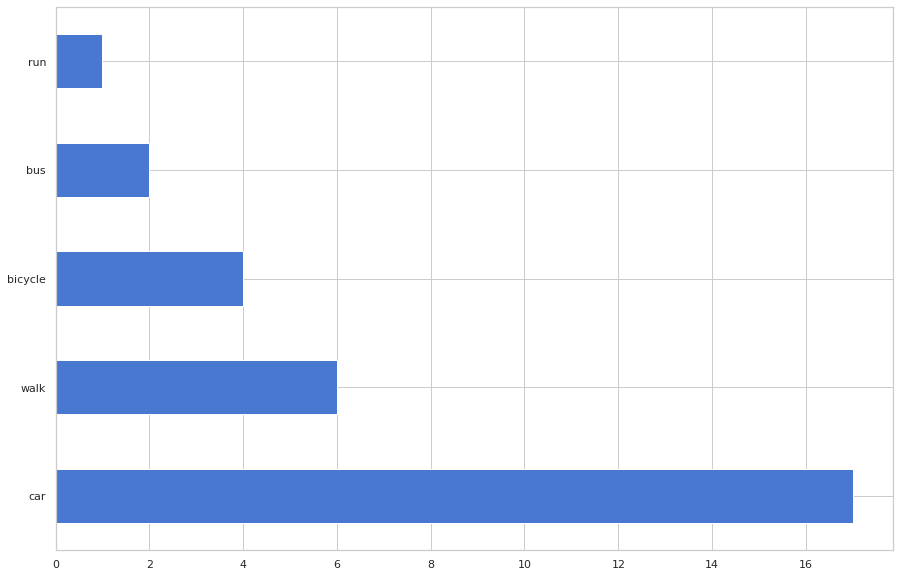

In [7]:
df_dataset['leg_mode'].value_counts().plot(kind='barh')

# Splitting the dataset into the Training set and Test set

In [8]:
# import train_test_split
from sklearn.model_selection import train_test_split

# define label
y = df_dataset['leg_mode']

traintest_dict = {"X_train": {},
                  "X_test": {},
                  "y_train": {},
                  "y_test": {}}

# split test and training data per feature sets
# (Note: if necessary, reduce to dictionary comprehension)
for feature_set in dict_features.keys():
    
    # define feature set
    X = df_dataset[dict_features[feature_set]]
    
    print(f"features: {feature_set}:\n{X.info()}")
    
    # split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # save train and test features into dictionary
    traintest_dict["X_train"][feature_set] = X_train
    traintest_dict["X_test"][feature_set] = X_test
    
# save train and test labels in dictionary
traintest_dict["y_train"] = y_train
traintest_dict["y_test"] = y_test

        
print(traintest_dict)

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 16a4e855-e304-4ccb-8e76-fe4ef2216923 to fc1a54cb-1bea-467f-a67b-4d5cbea8b561
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   leg_accel_25        30 non-null     float64
 1   leg_accel_50        30 non-null     float64
 2   leg_accel_75        30 non-null     float64
 3   leg_accel_90        30 non-null     float64
 4   leg_accel_ave       30 non-null     float64
 5   leg_accel_init50m   30 non-null     float64
 6   leg_accel_max       30 non-null     float64
 7   leg_accel_min       30 non-null     float64
 8   leg_accel_std       30 non-null     float64
 9   leg_duration        30 non-null     float64
 10  leg_length          30 non-null     float64
 11  leg_speed_25        30 non-null     float64
 12  leg_speed_50        30 non-null     float64
 13  leg_speed_75        30 non-null     float64
 14  leg_speed_90        30 non-null     float64


## Feature Scaling

For this exercise we will compare the results of both scaled and unscaled data

## Scaled Data

In [9]:
# import scaling class
from sklearn.preprocessing import StandardScaler

# 
traintest_scaled_dict = {"X_train": {},
                         "X_test": {}}

# scale test and training data per feature sets
# (Note: if necessary, reduce to dictionary comprehension)
for feature_set in dict_features.keys():
    
    # define features
    X_train = traintest_dict["X_train"][feature_set]
    X_test = traintest_dict["X_test"][feature_set]
    
    print(f"Training data: {feature_set}:\n{X_train.info()}")
    print(f"Testing data: {feature_set}:\n{X_test.info()}")
    
    
    # instantiate scaler and scale features
    sc = StandardScaler()
    traintest_scaled_dict["X_train"][feature_set] = sc.fit_transform(X_train)
    traintest_scaled_dict["X_test"][feature_set] = sc.transform(X_test)
    
    
    
#     print(f"Training data: {feature_set}:\n{traintest_scaled_dict["X_train"][feature_set]}")
#     print(f"Testing data: {feature_set}:\n{traintest_scaled_dict["X_test"][feature_set]}")
    
print(traintest_scaled_dict)


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 445c43c3-4a02-4ef1-92ba-31eaec6e913d to 9aaba78e-e178-4fd5-98e1-e9938ab40165
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   leg_accel_25        22 non-null     float64
 1   leg_accel_50        22 non-null     float64
 2   leg_accel_75        22 non-null     float64
 3   leg_accel_90        22 non-null     float64
 4   leg_accel_ave       22 non-null     float64
 5   leg_accel_init50m   22 non-null     float64
 6   leg_accel_max       22 non-null     float64
 7   leg_accel_min       22 non-null     float64
 8   leg_accel_std       22 non-null     float64
 9   leg_duration        22 non-null     float64
 10  leg_length          22 non-null     float64
 11  leg_speed_25        22 non-null     float64
 12  leg_speed_50        22 non-null     float64
 13  leg_speed_75        22 non-null     float64
 14  leg_speed_90        22 non-null     float64


## Training the Logistic Regression model on the Training set

In [10]:
# import ml_model class
from sklearn.linear_model import LogisticRegression

# create model dictionsary
model_dict = {}

# define training labels
y_train = traintest_dict["y_train"]

# train models per feature set
# (Note: if necessary, reduce to dictionary comprehension)
for feature_set in dict_features.keys():
    
    # instantiate model
    classifier = LogisticRegression(random_state = 0)
    
    # define training features
    X_train = traintest_dict["X_train"][feature_set]
    
    # train model
    model_dict[feature_set] = classifier.fit(X_train, y_train)

print(model_dict)


{'a0': LogisticRegression(random_state=0), 'b0': LogisticRegression(random_state=0), 'b1': LogisticRegression(random_state=0), 'b2': LogisticRegression(random_state=0), 'b4': LogisticRegression(random_state=0), 'c0': LogisticRegression(random_state=0), 'd0': LogisticRegression(random_state=0)}


## Model Evaluation and Predictions

In [11]:
# import metrics functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# define dictionary
modeleval_dict = {'X_train': {"y_pred": {},
                              "confusion_matrix": {},
                              "classification_report": {}},
                  'X_test': {"y_pred": {},
                             "confusion_matrix": {},
                             "classification_report": {}}}

predictions_dict = {}

# evaluate model performance and make final predictions per feature sets
# (Note: if necessary, reduce to dictionary comprehension)
for feature_set in dict_features.keys():
    
    # define model and features for evaluationa and final prediction
    ml_model = model_dict[feature_set]
    X_train = traintest_dict['X_train'][feature_set]
    X_test = traintest_dict['X_test'][feature_set]
    X_prediction = df_train[dict_features[feature_set]]
    
    # make prediction for evaluation
    modeleval_dict['X_train']["y_pred"][feature_set] = ml_model.predict(X_train)
    modeleval_dict['X_test']["y_pred"][feature_set] = ml_model.predict(X_test)
    
    
    # make final prediction
    prediction_arr = ml_model.predict(X_prediction)
    predictions_dict[feature_set] = pd.DataFrame(prediction_arr, index=df_train.index)
    
    # define test and predicted labels
    y_test = traintest_dict['y_test']
    y_train = traintest_dict['y_train']
    y_pred_train = modeleval_dict['X_train']["y_pred"][feature_set]
    y_pred_test = modeleval_dict['X_test']["y_pred"][feature_set]
    
    
    # test model performance
    modeleval_dict['X_train']["confusion_matrix"][feature_set] = confusion_matrix(y_train, y_pred_train)
    modeleval_dict['X_train']["classification_report"][feature_set] = pd.DataFrame\
                (classification_report(y_train, y_pred_train, output_dict=True)).transpose()
    modeleval_dict['X_test']["confusion_matrix"][feature_set] = confusion_matrix(y_test, y_pred_test)
    modeleval_dict['X_test']["classification_report"][feature_set] = pd.DataFrame\
                (classification_report(y_test, y_pred_test, output_dict=True)).transpose()
    
    print(f"Evaluation Results for {feature_set}:")
    print(f"Training Data Predictions:\n{modeleval_dict['X_train']['classification_report'][feature_set]}")
    print(f"Test Data Predictions {feature_set}:\n{modeleval_dict['X_test']['classification_report'][feature_set]}\n\n")
    
# print(modeleval_dict)

Evaluation Results for a0:
Training Data Predictions:
              precision    recall  f1-score    support
bicycle        0.666667  1.000000  0.800000   4.000000
bus            0.000000  0.000000  0.000000   1.000000
car            0.800000  0.923077  0.857143  13.000000
run            0.000000  0.000000  0.000000   1.000000
walk           1.000000  0.333333  0.500000   3.000000
accuracy       0.772727  0.772727  0.772727   0.772727
macro avg      0.493333  0.451282  0.431429  22.000000
weighted avg   0.730303  0.772727  0.720130  22.000000
Test Data Predictions a0:
              precision    recall  f1-score  support
bicycle        0.000000  0.000000  0.000000    0.000
bus            0.000000  0.000000  0.000000    1.000
car            0.666667  0.500000  0.571429    4.000
walk           1.000000  0.333333  0.500000    3.000
accuracy       0.375000  0.375000  0.375000    0.375
macro avg      0.416667  0.208333  0.267857    8.000
weighted avg   0.708333  0.375000  0.473214    8.000



# Save Confusion Matrix Plots to PNG

predicted labels: ['bicycle' 'bicycle' 'bicycle' 'car' 'bicycle' 'car' 'walk' 'car']
plot confusionMatrix_LogisticRegression_a0 saved successfully


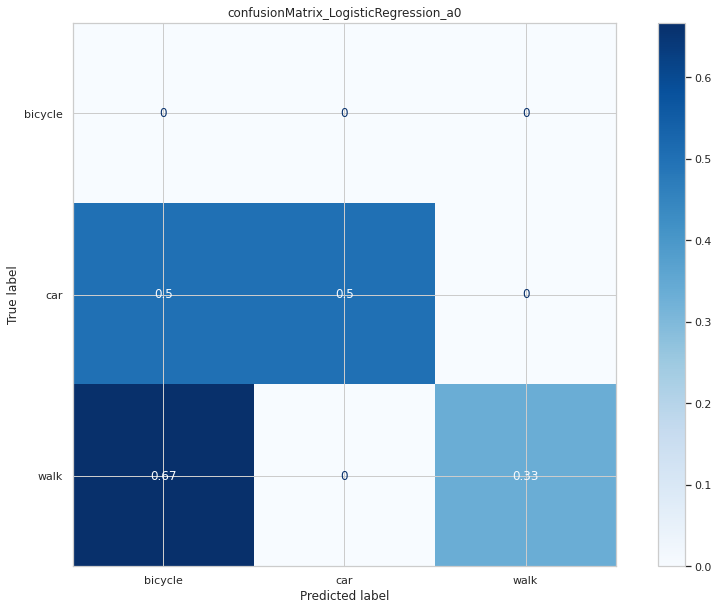

predicted labels: ['car' 'car' 'car' 'car' 'walk' 'bus' 'walk' 'car']
plot confusionMatrix_LogisticRegression_b0 saved successfully


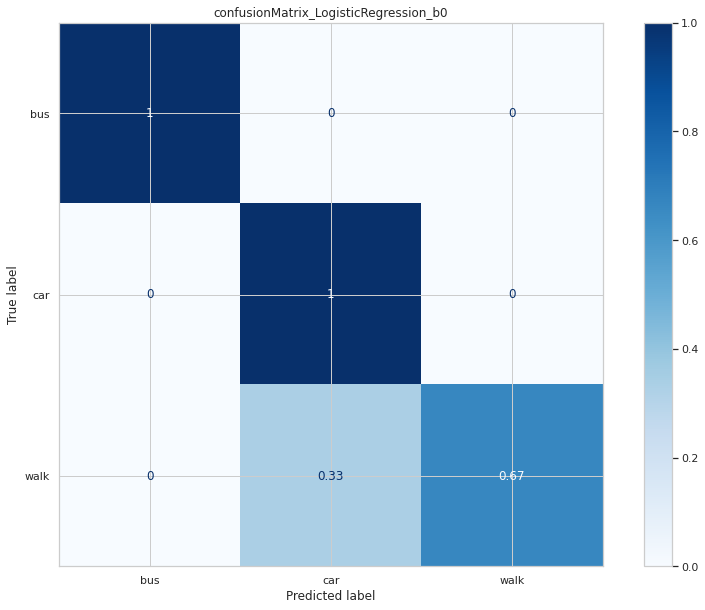

predicted labels: ['car' 'car' 'car' 'car' 'walk' 'bus' 'walk' 'car']
plot confusionMatrix_LogisticRegression_b1 saved successfully


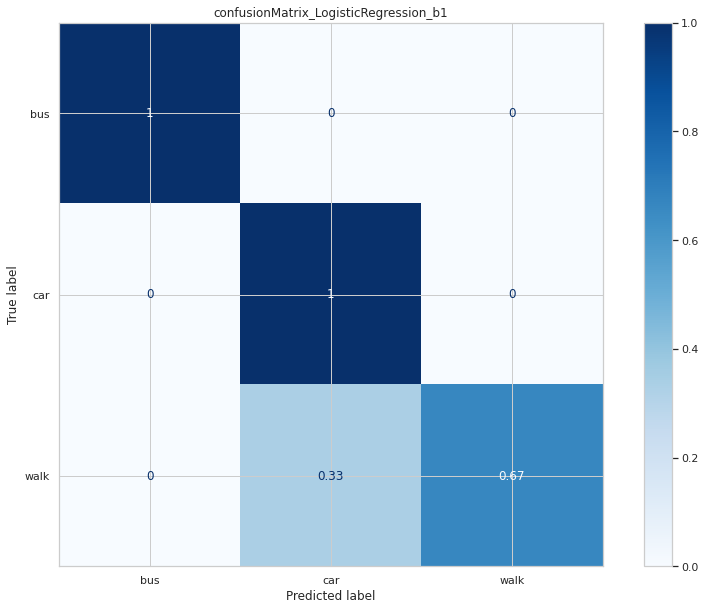

predicted labels: ['car' 'car' 'bus' 'car' 'walk' 'bus' 'walk' 'car']
plot confusionMatrix_LogisticRegression_b2 saved successfully


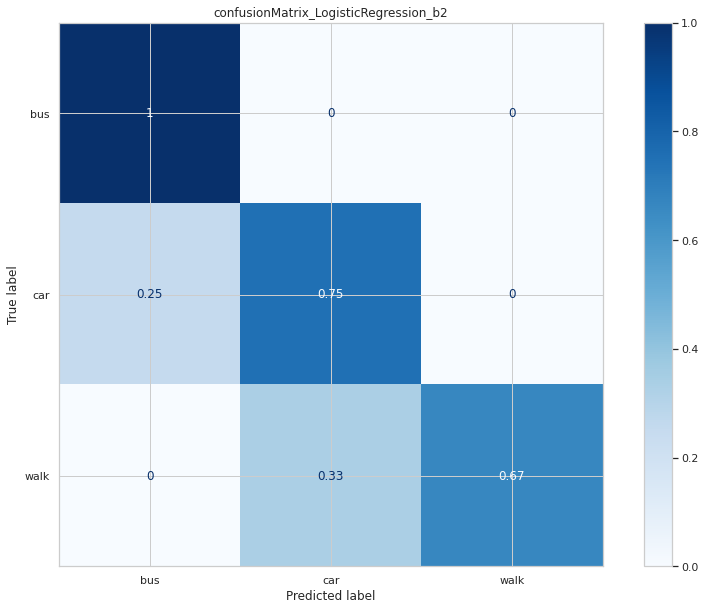

predicted labels: ['car' 'car' 'bicycle' 'car' 'walk' 'bus' 'walk' 'car']
plot confusionMatrix_LogisticRegression_b4 saved successfully


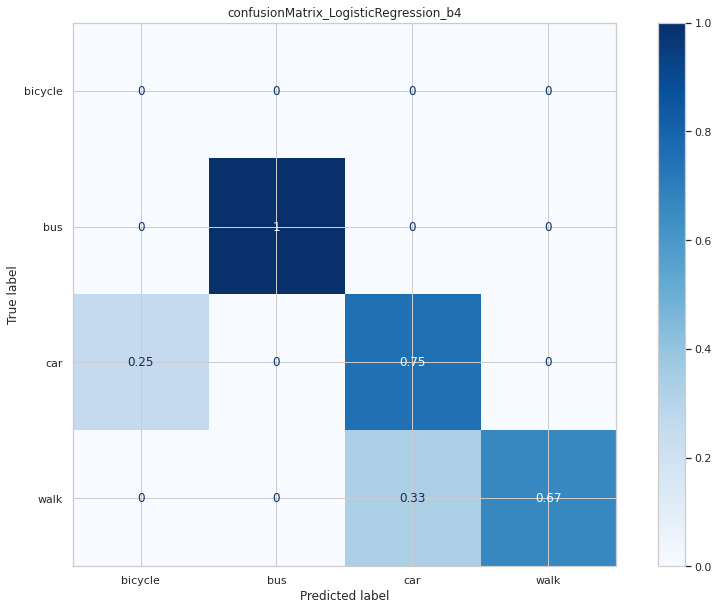

predicted labels: ['car' 'bicycle' 'car' 'car' 'walk' 'walk' 'walk' 'car']
plot confusionMatrix_LogisticRegression_c0 saved successfully


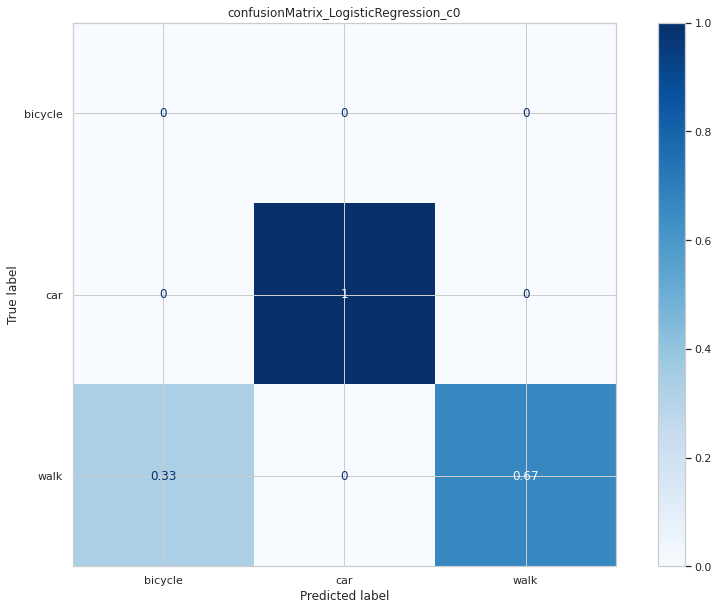

predicted labels: ['car' 'bicycle' 'bus' 'car' 'walk' 'bicycle' 'walk' 'car']
plot confusionMatrix_LogisticRegression_d0 saved successfully


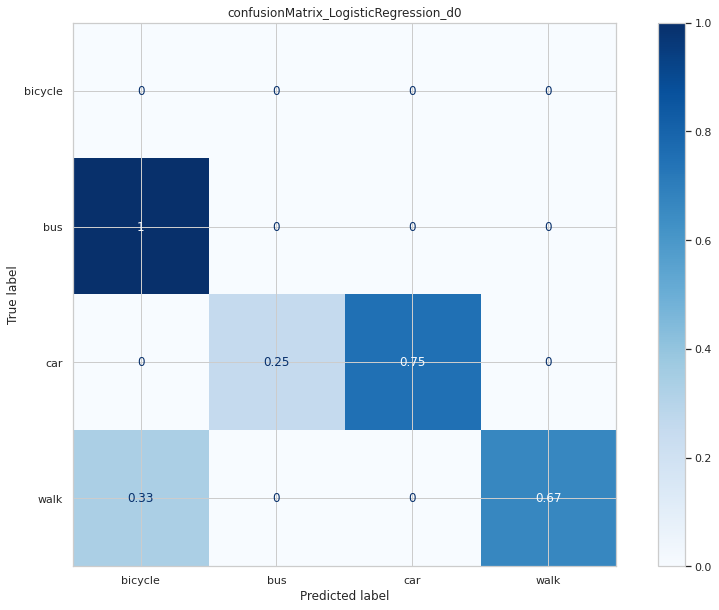

In [12]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plot_directory = os.path.join('..', '..', '..', '..', 'resources', 'reports', 'figures', 'machine_learning_plots', 'modal_detection')
y_test = traintest_dict['y_test']

for feature_set in dict_features.keys():
    
    # name plot file
    ml_model = model_dict[feature_set]
    plot_type = 'confusionMatrix'
    model_name = type(ml_model).__name__
    plot_filename = '_'.join([plot_type, model_name,
                              feature_set])
    plot_filepath = os.path.join(plot_directory, plot_filename)
    
    # plot confusion matrix
    y_pred_test = modeleval_dict['X_test']["y_pred"][feature_set]
    cm_labels = [label for label in ml_model.classes_
                 if label in y_pred_test]
    
    X_test = traintest_dict['X_test'][feature_set]
    plot_confusion_matrix(ml_model, X_test, y_test, cm_labels, cmap=plt.cm.Blues, normalize='true')
    
    # format plot
    plt.title(plot_filename)
    
    # save figure
    plt.savefig(plot_filepath)
    print(f"predicted labels: {y_pred_test}")
    print(f"plot {plot_filename} saved successfully")
    
    plt.show()  
    
    

# Save predictions to csv

In [13]:
file_directory = os.path.join('..', '..', '..', '..', 'resources', 'data', 'processed', 'predictions', 'modal_detection')

# save model as pickle per feature sets
# Note: if necessary, reduce to dictionary comprehension
for feature_set in dict_features.keys():
    
    
    prediction_type = 'modalDetection'
    prediction_date = str(pd.to_datetime('now').date()).replace('-','')  
    prediction_filename = '_'.join([prediction_type, type(ml_model).__name__,
                                    feature_set, prediction_date, 'v003' '.csv'])
    
    prediction_filepath = os.path.join(file_directory, prediction_filename)
    df_predictions = predictions_dict[feature_set]
    df_predictions.to_csv(prediction_filepath)
    print(f"csv {prediction_filename}")
    

csv modalDetection_LogisticRegression_a0_20210518_v003.csv
csv modalDetection_LogisticRegression_b0_20210518_v003.csv
csv modalDetection_LogisticRegression_b1_20210518_v003.csv
csv modalDetection_LogisticRegression_b2_20210518_v003.csv
csv modalDetection_LogisticRegression_b4_20210518_v003.csv
csv modalDetection_LogisticRegression_c0_20210518_v003.csv
csv modalDetection_LogisticRegression_d0_20210518_v003.csv


# Save a models


In [14]:
# import pickle library
import pickle

In [15]:
def make_pickle(model_name, model):
    
    """
    This function takes the string of a model name and model object as input and
    saves a pickle file of the model in the current directory of the file.
    """
    
    # create file name
    model_save_path = model_name + ".pkl"

    # open file to write binary
    with open(model_save_path,'wb') as file:

        # save model as file name
        pickle.dump(model,file)
        print(f'Pickle file for {os.path.split(model_filepath)[1]} successfully saved')
        

In [16]:
import pickle

model_directory = os.path.join('..', '..', '..', '..', 'resources', 'models', 'modal_detection', 'base_models')

# save model as pickle per feature sets
# Note: if necessary, reduce to dictionary comprehension
for feature_set in dict_features.keys():
    
    ml_model = model_dict[feature_set]
    prediction_type = 'modalDetection'
    prediction_date = str(pd.to_datetime('now').date()).replace('-','')
    model_filename = '_'.join([prediction_type, type(ml_model).__name__,
                               feature_set, prediction_date, 'v003'])
    model_filepath = os.path.join(model_directory, model_filename)
    make_pickle(model_filepath, ml_model)
    

Pickle file for modalDetection_LogisticRegression_a0_20210518_v003 successfully saved
Pickle file for modalDetection_LogisticRegression_b0_20210518_v003 successfully saved
Pickle file for modalDetection_LogisticRegression_b1_20210518_v003 successfully saved
Pickle file for modalDetection_LogisticRegression_b2_20210518_v003 successfully saved
Pickle file for modalDetection_LogisticRegression_b4_20210518_v003 successfully saved
Pickle file for modalDetection_LogisticRegression_c0_20210518_v003 successfully saved
Pickle file for modalDetection_LogisticRegression_d0_20210518_v003 successfully saved


In [17]:
# X_predict = sc.transform(df_predict[x_cols].dropna())
# array_y = classifier.predict(X_predict)
# df_y = df_predict.dropna()

# df_y['leg_mode'] = array_y
# df_y = df_y[['leg_mode']]


# print(f"classes predicted: \n{df_y['leg_mode'].unique()}")
# df_y.head()